### Exploring how removing trials at different speeds (for now zero and non zero) affect how 'nois' the angle representation looks

The notebook is very messy right now. But I will hopefully update it with more comments later

It looks like the trials where the running speed was zero have less noisy representations of angles in PC space (the ring is not as spread out
- It is important to note though that there are more zero speed trials than there are trials of all other speeds

In [ ]:
#@title Data retrieval
import os, requests

fname = "stringer_orientations.npy"
url = "https://osf.io/ny4ut/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [ ]:
#@title Import matplotlib and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [ ]:
import numpy as np
import scipy.stats

import sklearn.decomposition 
import sklearn.model_selection
import sklearn.pipeline
import sklearn.linear_model
import sklearn.metrics

from sklearn.model_selection import ShuffleSplit

In [ ]:
#@title Data loading
import numpy as np
dat = np.load('stringer_orientations.npy', allow_pickle=True).item()
print(dat.keys())

dict_keys(['sresp', 'istim', 'stat', 'u_spont', 'v_spont', 'mean_spont', 'std_spont', 'stimtimes', 'frametimes', 'camtimes', 'run', 'info', 'xyz'])


dat has fields:
* `dat['sresp']`: neurons by stimuli, a.k.a. the neural response data (23589 by 4598)
* `dat['xyz']`: three-dimensional position of each neuron in the brain. 
* `dat['run']`: 1 by stimuli, a.k.a. the running speed of the animal in a.u.
* `dat['istim']`: 1 by stimuli, goes from 0 to 2*np.pi, the orientations shown on each trial
* `dat['u_spont']`: neurons by 128, the weights for the top 128 principal components of spontaneous activity. Unit norm.
* `dat['v_spont']`: 128 by 910, the timecourses for the top 128 PCs of spont activity.
* `dat['u_spont'] @ dat['v_spont']`: a reconstruction of the spontaneous activity for 910 timepoints interspersed throughout the recording.
* `dat['stat']`: 1 by neurons, some statistics for each neuron, see Suite2p for full documentation.


In [ ]:
pca = sklearn.decomposition.PCA(random_state=1)

In [ ]:
z_data = scipy.stats.zscore(dat['sresp'],axis=1)

In [ ]:
z_transform = pca.fit(z_data.T)

In [ ]:
z_transform = pca.transform(z_data.T)

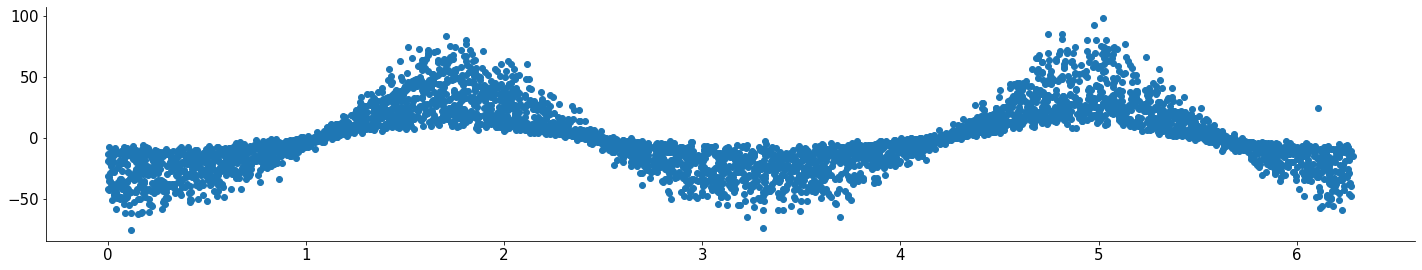

In [ ]:
plt.scatter(dat['istim'],z_transform[:,1])

In [ ]:
len(dat['istim'])/2

2299.0

In [ ]:
first

array([3599,    2, 3646, ..., 3570, 2152, 2089])

In [ ]:
idx_ang_sort = np.argsort(dat['istim'])
first = idx_ang_sort[:2299]
second = idx_ang_sort[2299:]

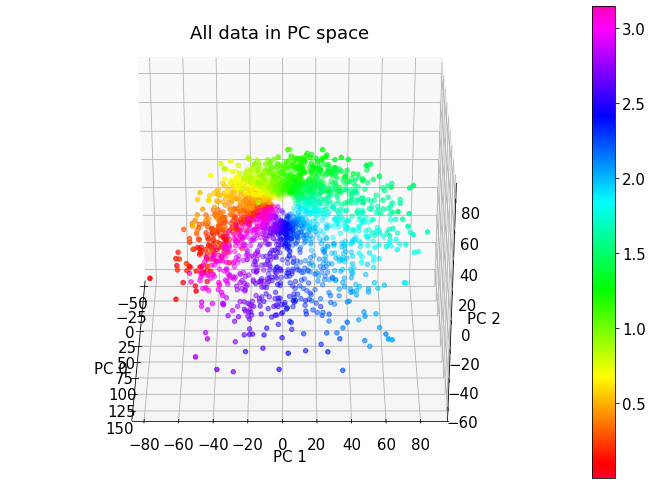

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
p = ax.scatter(z_transform[first,0],z_transform[first,1],z_transform[first,2],c = dat['istim'][first],cmap='gist_rainbow')
ax.set_xlabel('PC 0')
ax.set_ylabel('PC 1')
ax.set_zlabel('PC 2')
plt.title('All data in PC space ')
fig.colorbar(p)
ax.view_init(30,360)

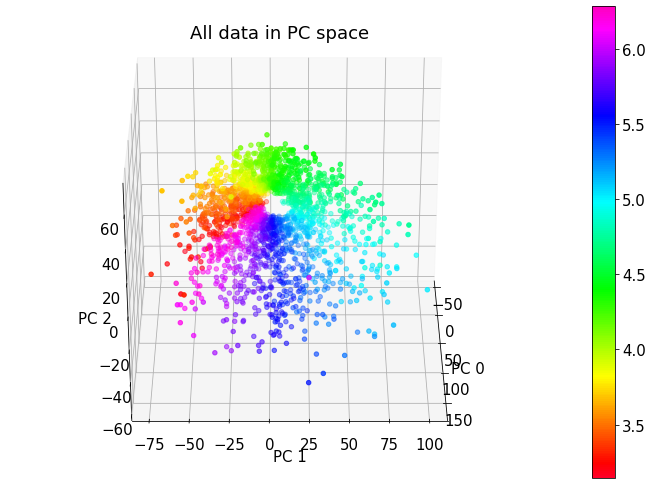

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
p = ax.scatter(z_transform[second,0],z_transform[second,1],z_transform[second,2],c = dat['istim'][second],cmap='gist_rainbow')
ax.set_xlabel('PC 0')
ax.set_ylabel('PC 1')
ax.set_zlabel('PC 2')
plt.title('All data in PC space ')
fig.colorbar(p)
ax.view_init(30,360)

In [ ]:
idx_r0 = np.nonzero(dat['run'])

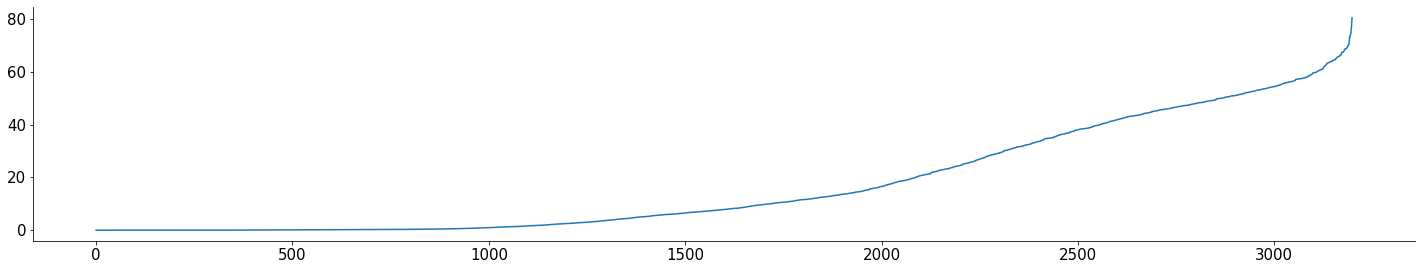

In [ ]:
plt.plot(np.sort(dat['run'][idx_r0]))

In [ ]:
np.sort(dat['run'][idx_r0])[0]

8.0301356e-07

In [ ]:
np.sort(dat['run'])[0]

0.0

In [ ]:
# get logical array where 1s are greater than 2 and zeros are less than 2
nozero_elements = dat['run'] > 2

In [ ]:

non_zero_elements = nozero_elements.astype(int)

In [ ]:
non_zero_elements

(4598,)

In [ ]:
# get the indices of elements that are greater than zero
idx_nonzero = np.nonzero(non_zero_elements)[0]

In [ ]:
idx_nonzero.shape

(2053,)

In [ ]:
all_idx = np.arange(len(dat['run']))

In [ ]:
idx_zero = np.setdiff1d(all_idx,idx_nonzero)

In [ ]:
idx_zero.shape

(2545,)

In [ ]:
idx_nonzero.shape

(2053,)

In [ ]:
2053+2545

4598

In [ ]:
np.sort(dat['run'][idx_zero])

array([0.       , 0.       , 0.       , ..., 1.9598457, 1.9782507,
       1.9934838], dtype=float32)

In [ ]:
np.sort(dat['run'][idx_nonzero])

array([[ 2.0064392,  2.012645 ,  2.0250804, ..., 75.98986  , 77.8298   ,
        80.61597  ]], dtype=float32)

In [ ]:
dat['istim'][idx_nonzero]

array([[2.62022653e+00, 7.18638172e-04, 1.89961158e+00, ...,
        4.81665470e+00, 5.79069544e+00, 5.09422873e+00]])

In [ ]:
idx_nonzero.shape

(1, 2053)

In [ ]:
2053/2

1026.5

In [ ]:
idx_nonzero_ang_sort = np.argsort(dat['istim'][idx_nonzero])
dat['istim'][idx_nonzero][idx_nonzero_ang_sort[:1026]]

array([7.18638172e-04, 2.50309571e-03, 4.65529343e-03, ...,
       3.08045698e+00, 3.08103317e+00, 3.08509758e+00])

In [ ]:
dat['istim'][idx_nonzero][idx_nonzero_ang_sort[1026:]]

array([3.08805694, 3.08846926, 3.08864525, ..., 6.26989184, 6.27260914,
       6.27388938])

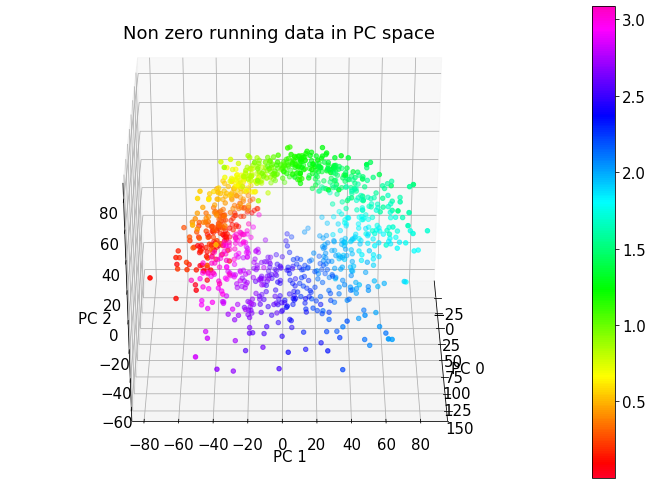

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
p = ax.scatter(z_transform[idx_nonzero,0][idx_nonzero_ang_sort[:1026]],z_transform[idx_nonzero,1][idx_nonzero_ang_sort[:1026]],z_transform[idx_nonzero,2][idx_nonzero_ang_sort[:1026]],c = dat['istim'][idx_nonzero][idx_nonzero_ang_sort[:1026]],cmap='gist_rainbow')
ax.set_xlabel('PC 0')
ax.set_ylabel('PC 1')
ax.set_zlabel('PC 2')
plt.title('Non zero running data in PC space ')
fig.colorbar(p)
ax.view_init(30,360)

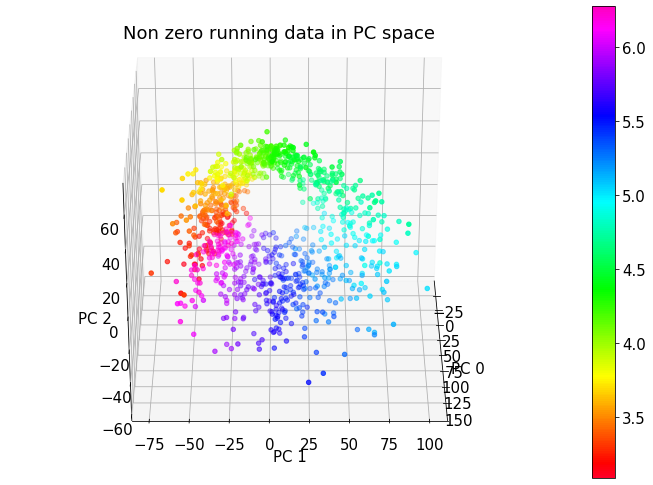

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
p = ax.scatter(z_transform[idx_nonzero,0][idx_nonzero_ang_sort[1026:]],z_transform[idx_nonzero,1][idx_nonzero_ang_sort[1026:]],z_transform[idx_nonzero,2][idx_nonzero_ang_sort[1026:]],c = dat['istim'][idx_nonzero][idx_nonzero_ang_sort[1026:]],cmap='gist_rainbow')
ax.set_xlabel('PC 0')
ax.set_ylabel('PC 1')
ax.set_zlabel('PC 2')
plt.title('Non zero running data in PC space ')
fig.colorbar(p)
ax.view_init(30,360)

In [ ]:
idx_zero_ang_sort = np.argsort(dat['istim'][idx_zero])
dat['istim'][idx_zero][idx_zero_ang_sort[:1272]]

array([6.09159136e-04, 2.52599689e-03, 4.80277561e-03, ...,
       3.19901721e+00, 3.20070851e+00, 3.20363265e+00])

In [ ]:
len(idx_zero_ang_sort)/2

1272.5

In [ ]:
dat['istim'][idx_zero][idx_zero_ang_sort[1272:]]

array([3.203786  , 3.20576806, 3.21242233, ..., 6.2732174 , 6.27438312,
       6.28240486])

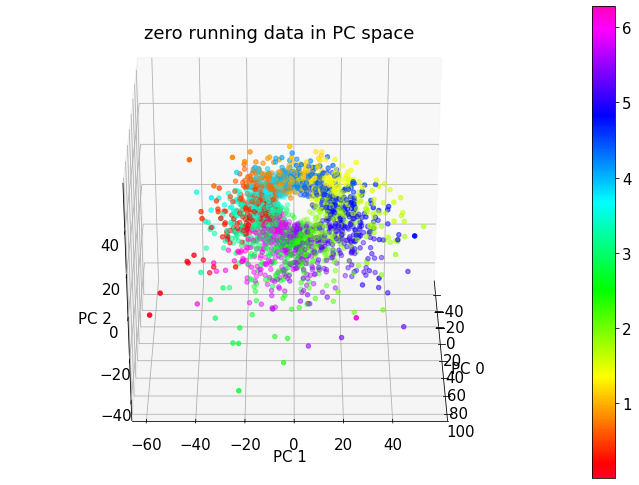

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
p = ax.scatter(z_transform[idx_zero,0],z_transform[idx_zero,1],z_transform[idx_zero,2],c = dat['istim'][idx_zero],cmap='gist_rainbow')
ax.set_xlabel('PC 0')
ax.set_ylabel('PC 1')
ax.set_zlabel('PC 2')
plt.title('zero running data in PC space ')
fig.colorbar(p)
ax.view_init(30,360)

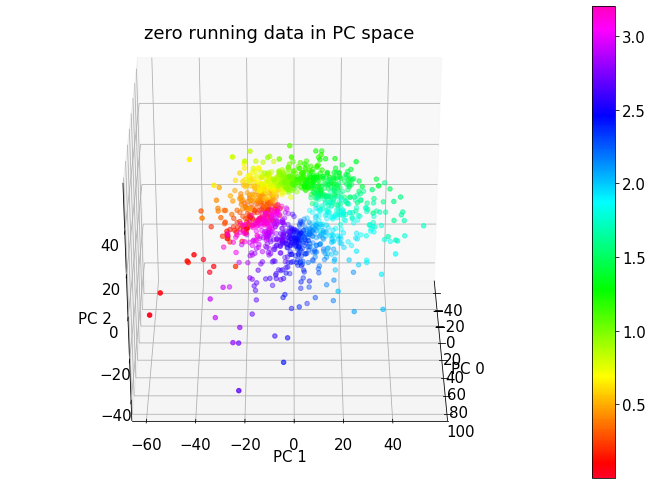

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
p = ax.scatter(z_transform[idx_zero,0][idx_zero_ang_sort[:1272]],z_transform[idx_zero,1][idx_zero_ang_sort[:1272]],z_transform[idx_zero,2][idx_zero_ang_sort[:1272]],c = dat['istim'][idx_zero][idx_zero_ang_sort[:1272]],cmap='gist_rainbow')
ax.set_xlabel('PC 0')
ax.set_ylabel('PC 1')
ax.set_zlabel('PC 2')
plt.title('zero running data in PC space ')
fig.colorbar(p)
ax.view_init(30,360)

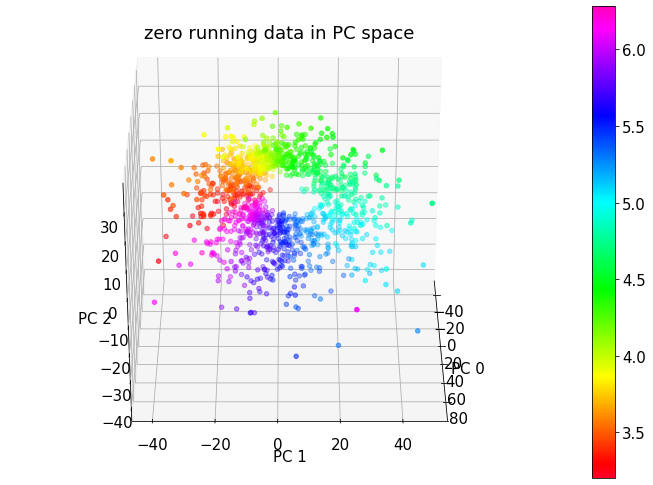

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
p = ax.scatter(z_transform[idx_zero,0][idx_zero_ang_sort[1272:]],z_transform[idx_zero,1][idx_zero_ang_sort[1272:]],z_transform[idx_zero,2][idx_zero_ang_sort[1272:]],c = dat['istim'][idx_zero][idx_zero_ang_sort[1272:]],cmap='gist_rainbow')
ax.set_xlabel('PC 0')
ax.set_ylabel('PC 1')
ax.set_zlabel('PC 2')
plt.title('zero running data in PC space ')
fig.colorbar(p)
ax.view_init(30,360)